In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
days = 100
prices = 50 + 2 * np.arange(days) + np.random.randn(days) * 5

In [ ]:
date_range = pd.date_range(start="2023-01-01", periods=days, freq="D")
df = pd.DataFrame({"Date": date_range, "Price": prices})
df.head()
df.head(-5)

,Date,Price
0,2023-01-01,52.483571
1,2023-01-02,51.308678
2,2023-01-03,57.238443
3,2023-01-04,63.615149
4,2023-01-05,56.829233
...,...,...
90,2023-04-01,230.485388
91,2023-04-02,236.843225
92,2023-04-03,230.489735
93,2023-04-04,234.361689


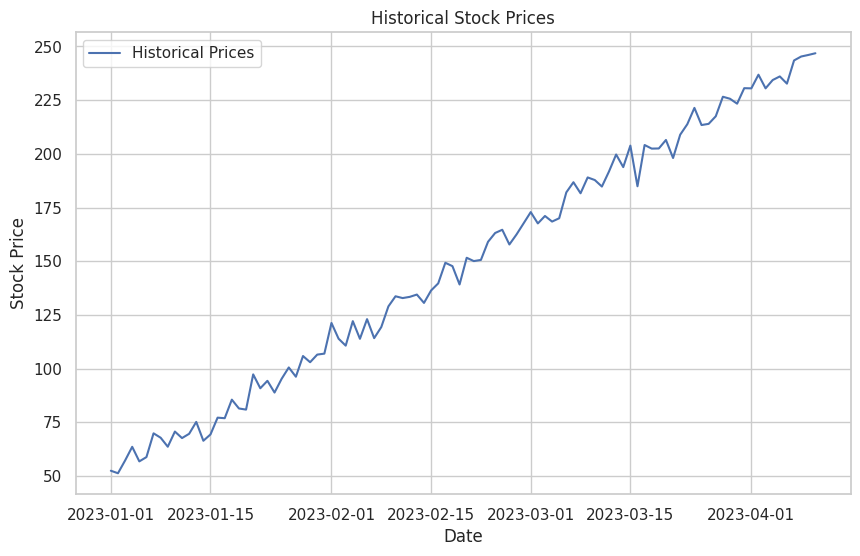

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Price"], label="Historical Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Historical Stock Prices")
plt.legend()
plt.show()


In [ ]:
df["Day"] = np.arange(1, days + 1)
df["Day"] = (df["Day"] - df["Day"].mean()) / df["Day"].std()

In [ ]:
train_data, test_data = df.iloc[:int(0.8 * len(df))], df.iloc[int(0.8 * len(df)):]


In [ ]:
def gradient_descent(X, y, learning_rate=0.1, epochs=10000):
    m = len(X)
    theta = np.random.randn(2, 1)
    X_b = np.c_[np.ones((m, 1)), X]

    for epoch in range(epochs):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

    return theta

In [ ]:
X_train = train_data["Day"].values.reshape(-1, 1)
y_train = train_data["Price"].values.reshape(-1, 1)
theta = gradient_descent(X_train, y_train)

In [ ]:
X_test = test_data["Day"].values.reshape(-1, 1)
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_predict = X_test_b.dot(theta)
print(y_predict)


[[209.62328021]
 [211.62926739]
 [213.63525457]
 [215.64124176]
 [217.64722894]
 [219.65321613]
 [221.65920331]
 [223.6651905 ]
 [225.67117768]
 [227.67716486]
 [229.68315205]
 [231.68913923]
 [233.69512642]
 [235.7011136 ]
 [237.70710079]
 [239.71308797]
 [241.71907515]
 [243.72506234]
 [245.73104952]
 [247.73703671]]


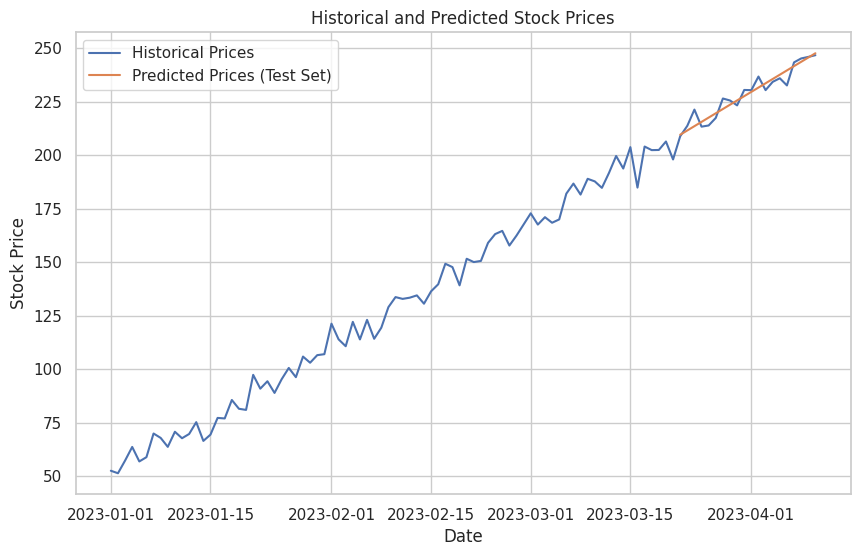

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Price"], label="Historical Prices")
plt.plot(test_data["Date"], y_predict, label="Predicted Prices (Test Set)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Historical and Predicted Stock Prices")
plt.legend()
plt.show()
